# Estudo de Caso: Classificação de Performance de Estudantes e Análise de Fatores de Influência

## Introdução:
Neste notebook, desenvolveremos um modelo de machine learning multiclasse para classificar a performance acadêmica de estudantes em cinco níveis distintos. O objetivo principal não é apenas prever a classificação de um aluno, mas sim **identificar quais são as variáveis que mais impactam no seu rendimento**. A hipótese inicial a ser testada é que **indicadores comportamentais diretos, como o número de faltas (`Absences`), são significativamente mais preditivos do que fatores demográficos (`Ethnicity`), de esforço pessoal (`StudyTimeWeekly`) ou de participação em atividades extracurriculares (`Volunteering`, `Music`, `Sports`, `Tutoring`)**.

### Workflow do Projeto:
* **Carregamento e Análise Exploratória de Dados (EDA):**
    * Analisar a estrutura do dataset, as distribuições de cada variável e a correlação entre elas.
    * Investigar a distribuição da variável alvo (`GradeClass`) para verificar o balanceamento entre as classes.

* **Pré-processamento e Feature Engineering:**
    * Realizar a codificação de variáveis categóricas (ex: `Gender`, `Ethnicity`).
    * Normalizar ou padronizar as variáveis numéricas para otimizar a performance do modelo.

* **Construção e Treinamento de Modelos:**
    * Utilizar a biblioteca `Scikit-learn` para construir e comparar modelos de **classificação multiclasse** (ex: Regressão Logística Multinomial, Árvore de Decisão, Random Forest).
    * Dividir os dados em conjuntos de treino e teste (ex: 80%-20%).
    * Treinar os modelos utilizando os dados de treino.

* **Avaliação do Modelo:**
    * Avaliar o desempenho dos modelos no conjunto de teste utilizando métricas de classificação como Acurácia, Relatório de Classificação (com Precisão, Recall, F1-Score por classe) e a Matriz de Confusão.

* **Interpretação e Conclusões:**
    * Analisar a importância das features (features importance) para identificar quais variáveis mais influenciam a performance do estudante.
    * Discutir a validade da hipótese inicial e sugerir ações práticas que uma instituição de ensino poderia tomar com base nos resultados.

## 1. Carregamento e Análise Exploratória de Dados (EDA)
O dataset contém 15 variáveis que nos ajudarão a entender os fatores associados ao desempenho dos estudantes. As variáveis serão organizadas nas seguintes categorias:

---
**🔍 Variável de Identificação**
* **StudentID**: Identificador único para cada estudante.

**👤 Variáveis Demográficas**
* **Age**: Idade do estudante em anos.
* **Gender**: Gênero do estudante.
* **Ethnicity**: Etnia do estudante.

**📚 Variáveis Acadêmicas e Comportamentais**
* **StudyTimeWeekly**: Horas de estudo por semana.
* **Absences**: Número de faltas do estudante.
* **Tutoring**: Se o estudante participa de aulas de reforço (Sim/Não).
* **GPA**: *Grade Point Average* - Média de notas contínua (escala de 0.0 a 4.0).

**🏠 Variáveis de Contexto Familiar e Pessoal**
* **ParentalEducation**: Nível de escolaridade dos pais.
* **ParentalSupport**: Nível de apoio educacional recebido dos pais.
* **Extracurricular**: Participação em atividades extracurriculares.
* **Sports**: Participação em esportes.
* **Music**: Participação em atividades musicais.
* **Volunteering**: Participação em trabalho voluntário.

**🎯 Variável Alvo (Target)**
* **GradeClass**: Classificação da nota final do estudante, derivada do `GPA`.
    * 🔎 **Nota Técnica:** Esta é a variável alvo para nosso problema de **classificação multiclasse**. As classes são definidas da seguinte forma, onde um valor menor na classe representa uma performance melhor:
        * **Classe 0:** Excelente (GPA >= 3.5)
        * **Classe 1:** Bom (GPA de 3.0 a 3.49)
        * **Classe 2:** Razoável (GPA de 2.5 a 2.99)
        * **Classe 3:** Suficiente (GPA de 2.0 a 2.49)
        * **Classe 4:** Insuficiente (GPA < 2.0)

## Significado dos valores de cada coluna
    StudentID: Identificador único para cada estudante.
    
    Age: Idade do estudante em anos.
    
    Gender: Gênero do estudante 
    
    Ethnicity: Etnia ou grupo racial do estudante
    
    ParentalEducation: O mais alto nível de escolaridade alcançado pelos pais
    
    StudyTimeWeekly: O número de horas que o estudante dedica aos estudos por semana.
    
    Absences: O número total de faltas do estudante durante o período letivo.
    
    Tutoring: Indica se o estudante participa ou não de aulas de reforço/tutoria.
    
    ParentalSupport: Nível de apoio educacional que o estudante recebe dos pais.
    
    Extracurricular: Indica se o estudante participa de atividades extracurriculares.
    
    Sports: Indica se o estudante pratica esportes regularmente.
    
    Music: Indica se o estudante participa de atividades musicais.
    
    Volunteering: Indica se o estudante realiza trabalho voluntário.
    
    GPA: Grade Point Average - É a média de notas do estudante,de 0.0 a 4.0.
    
    GradeClass: A classificação final do estudante em forma de nota ou conceito.

In [192]:
# --- Manipulação e Visualização de Dados ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Pré-processamento e Modelagem (Scikit-learn) ---
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer  # <--- ADICIONADO AQUI
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# --- Balanceamento de Classes (Imbalanced-learn) ---
from imblearn.over_sampling import SMOTE

In [193]:
file_path = '/kaggle/input/student-performance/studentperformance.csv'
df = pd.read_csv(file_path)
display(df.head())

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [195]:
print(f"Há {df.shape[0]} linhas e {df.shape[1]} colunas")

Há 2392 linhas e 15 colunas


In [196]:
print("Quantidade de valores nulos por coluna:\n")
df.isnull().sum()

Quantidade de valores nulos por coluna:



StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [197]:
print("Dados Duplicados:\n")
df.duplicated().sum()

Dados Duplicados:



0

In [198]:
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [199]:
# Distribuição da variável target
df.GradeClass.value_counts()

GradeClass
4.0    1211
3.0     414
2.0     391
1.0     269
0.0     107
Name: count, dtype: int64

In [200]:
# Verificando incosistência - Há alunos com GPA muito discrepantes(exemplo: 4.0 e 0.8)

# Primeiro, crie um DataFrame apenas com a GradeClass == 0
df_grade_0 = df[df['GradeClass'] == 0]

# Agora, separe os dois grupos dentro dele
alunos_esperados = df_grade_0[df_grade_0['GPA'] >= 3.5]
alunos_anomalos = df_grade_0[df_grade_0['GPA'] < 3.5]

# Imprima as informações para provar seu ponto
print(f"Total de alunos com GradeClass = 0: {len(df_grade_0)}")
print("-" * 50)

print(f"--> {len(alunos_esperados)} alunos ESPERADOS (GPA entre 3.5 e 4):")
# Mostra as colunas mais relevantes
print(alunos_esperados[['StudentID', 'GPA', 'GradeClass']].head())

print("\n" + "=" * 50 + "\n")

print(f"--> {len(alunos_anomalos)} alunos ANÔMALOS (GPA abaixo de 3.5):")
# Mostra as colunas mais relevantes
display(alunos_anomalos[['StudentID', 'GPA', 'GradeClass']].head())

Total de alunos com GradeClass = 0: 107
--------------------------------------------------
--> 71 alunos ESPERADOS (GPA entre 3.5 e 4):
     StudentID       GPA  GradeClass
9         1010  3.573474         0.0
44        1045  4.000000         0.0
91        1092  3.506920         0.0
92        1093  3.552287         0.0
111       1112  3.545159         0.0


--> 36 alunos ANÔMALOS (GPA abaixo de 3.5):


,StudentID,GPA,GradeClass
2194,3195,1.174610,0.0
2198,3199,2.732661,0.0
2211,3212,2.268851,0.0
2214,3215,1.499702,0.0
2220,3221,0.576403,0.0


In [201]:
# Corrigindo valores da coluna GradeClass
def calcular_grade_class(gpa):
  if gpa >= 3.5:
    return 0
  elif 3.0 <= gpa < 3.5:
    return 1
  elif 2.5 <= gpa < 3.0:
    return 2
  elif 2.0 <= gpa < 2.5:
    return 3
  else:
    return 4

In [202]:
# Valores da coluna Grade Class antes da correção
df.GradeClass.value_counts()

GradeClass
4.0    1211
3.0     414
2.0     391
1.0     269
0.0     107
Name: count, dtype: int64

In [203]:
# Corrigindo a coluna GradeClass
df['GradeClass'] = df['GPA'].apply(calcular_grade_class)

In [204]:
# Valores da coluna Grade Class após a correção
df.GradeClass.value_counts()

GradeClass
4    1274
3     412
2     385
1     244
0      77
Name: count, dtype: int64

## Entendendo as Variáveis: Uma Análise Individual

In [205]:
# Separando as variáveis em categóricas e numéricas
categoricas = []
numericas = []

for coluna in df.columns:
    if(len(df[coluna].unique()) < 10):
        categoricas.append(coluna)
    else:
        numericas.append(coluna)

print("Colunas numéricas:",numericas)
print("\nCategóricas:\n",categoricas)

Colunas numéricas: ['StudentID', 'StudyTimeWeekly', 'Absences', 'GPA']

Categóricas:
 ['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GradeClass']


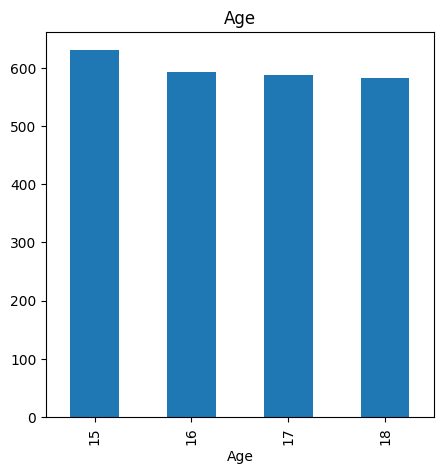

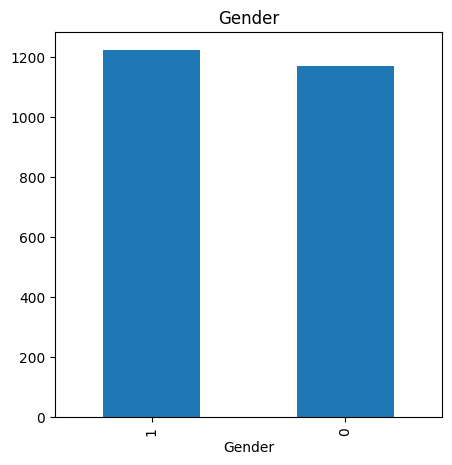

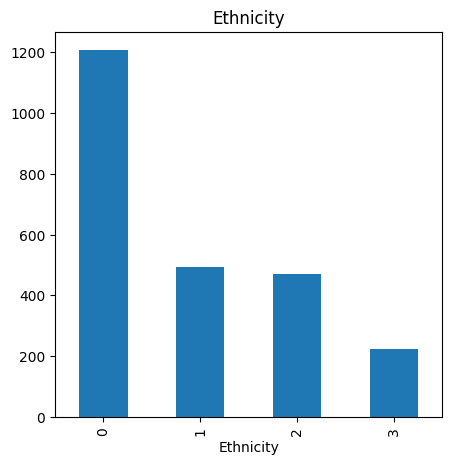

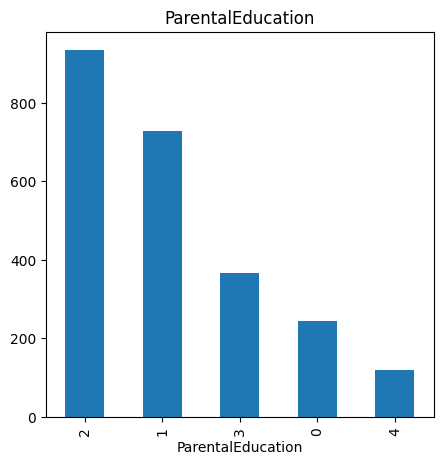

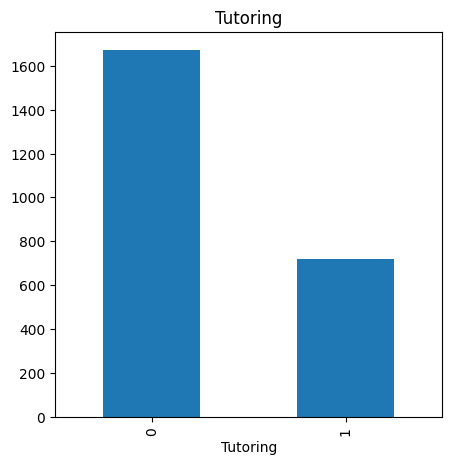

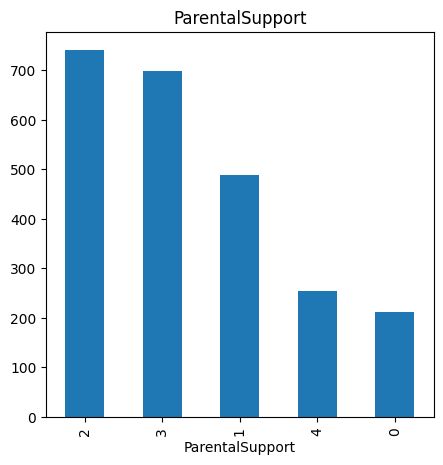

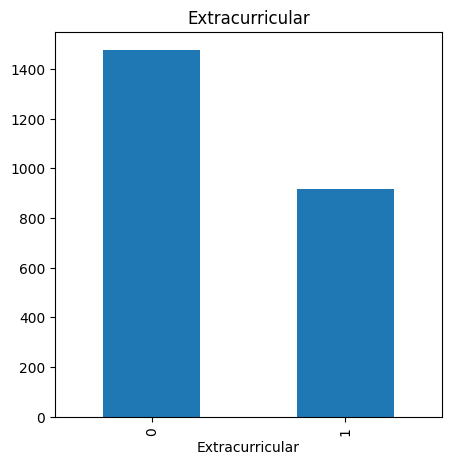

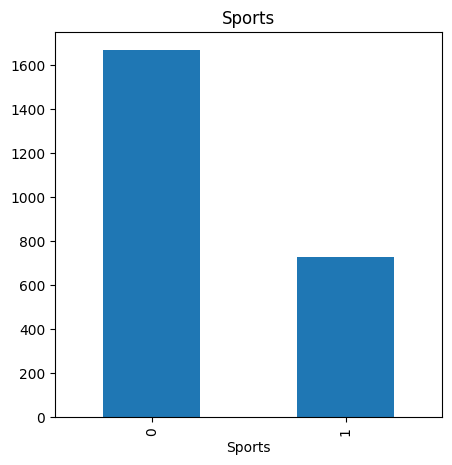

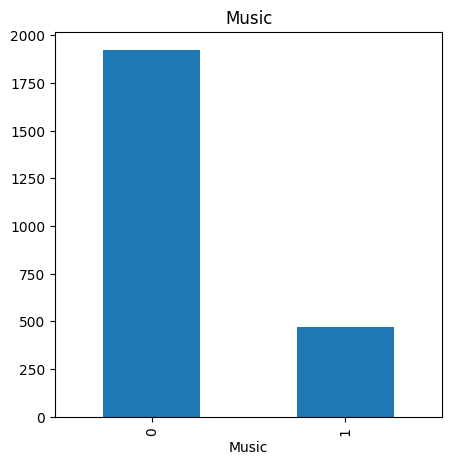

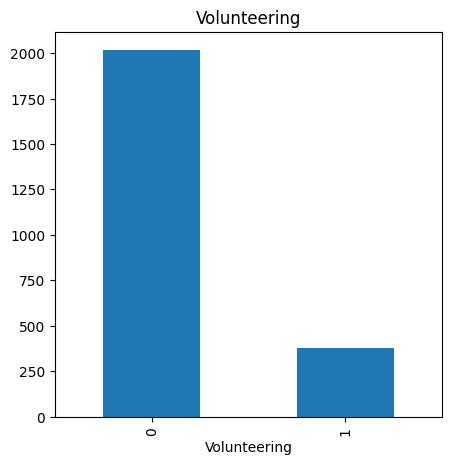

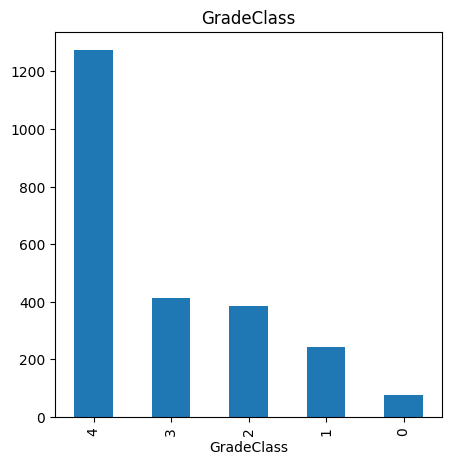

In [206]:
# Distribuição das colunas categoricas

for i in categoricas:
  plt.figure(figsize=(5,5))
  df[i].value_counts().plot(kind='bar')
  plt.title(i)
  plt.show()
    

**Praticamente todas as colunas, exceto Gênero e Idade apresentam divergência de classes**

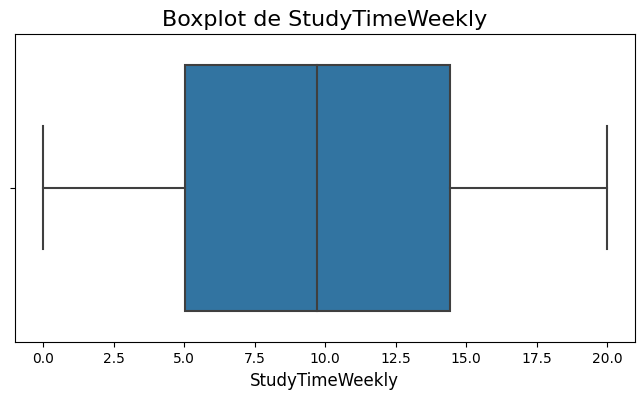

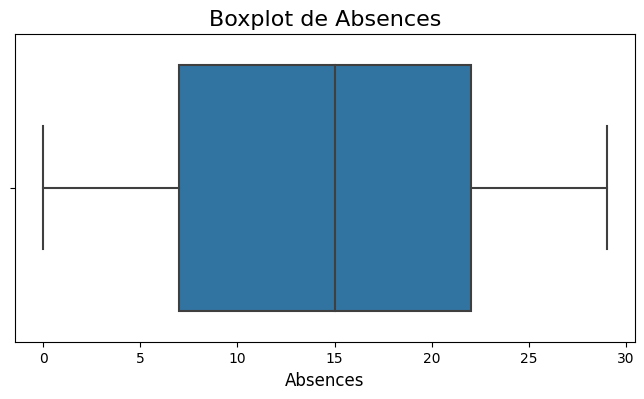

In [207]:
# Analisando colunas numéricas

# Removing unecessary columns
numericas.remove('StudentID')
numericas.remove('GPA')

for i in numericas:    
    # Cria o gráfico
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=i)
    
    # Títulos e rótulos
    plt.title(f'Boxplot de {i}', fontsize=16)
    nome_da_coluna = i
    plt.xlabel(nome_da_coluna, fontsize=12)
    plt.show()

## Matriz de Correlação


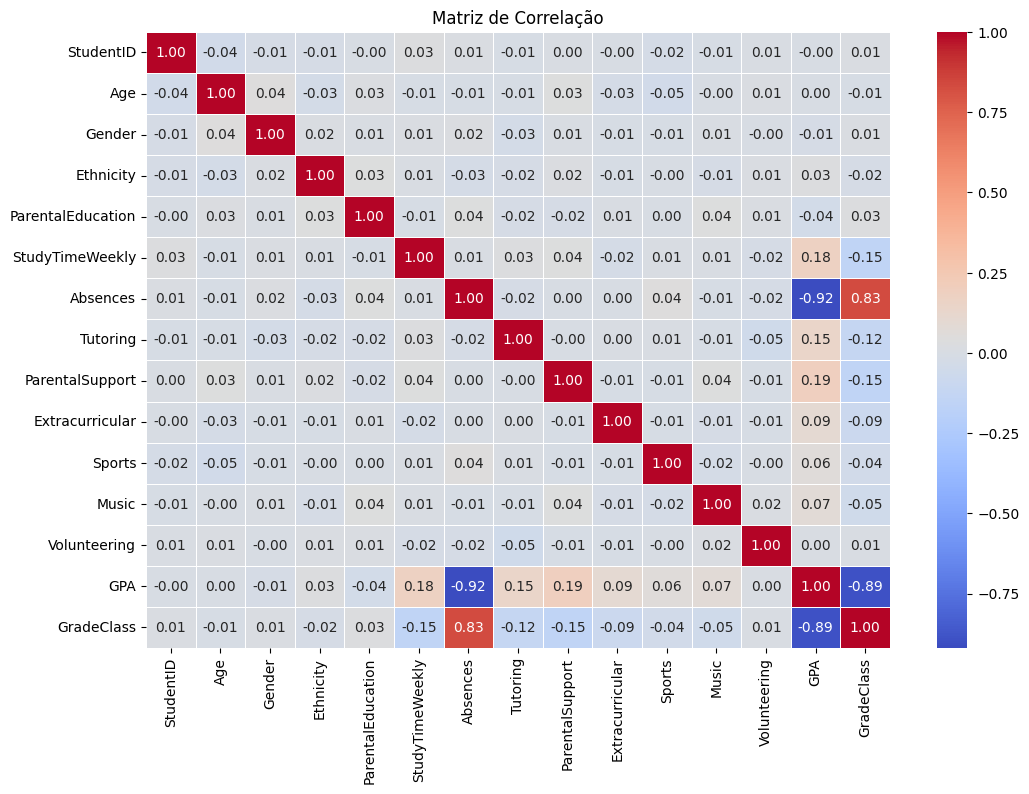

In [208]:

# Calculando a matriz de correlação
corr_matrix = df.corr()

# Criando o mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

**A variável que mais influencia na nota é o número de faltas. Quanto mais o aluno falta, menor sua nota.**

## Treinamento do Modelo de Classificação


In [209]:
# Separando features e variável alvo

y = df['GradeClass']

x = df.drop(columns=['GradeClass','GPA','StudentID'],axis=1)

**GPA foi retirado porque a coluna GradeClass é media a partir dele, queremos que o modelo utilize outras características. A coluna StudentID foi retirada porque não possui valor de negócio ao prever performance de alunos**

In [210]:
print(f"Colunas Numéricas: {numericas}")
print(f"Colunas Categóricas: {categoricas}")

Colunas Numéricas: ['StudyTimeWeekly', 'Absences']
Colunas Categóricas: ['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GradeClass']


In [211]:
# --- PASSO 1: Corrigir e Definir as Listas de Colunas ---
print("Passo 1: Definindo as colunas numéricas e categóricas...")

# Colunas que representam valores numéricos contínuos ou contagens
colunas_numericas = ['StudyTimeWeekly', 'Absences']

# Colunas que representam categorias distintas
colunas_categoricas = ['Age','Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 
                       'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering']

print(f"Colunas Numéricas: {colunas_numericas}")
print(f"Colunas Categóricas: {colunas_categoricas}")

Passo 1: Definindo as colunas numéricas e categóricas...
Colunas Numéricas: ['StudyTimeWeekly', 'Absences']
Colunas Categóricas: ['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering']


In [212]:

# --- PASSO 2: Criar o Pipeline de Pré-processamento com ColumnTransformer ---
print("\nPasso 2: Criando o pré-processador...")

# Pipeline para dados numéricos: Padronização
transformador_numerico = StandardScaler()

# Pipeline para dados categóricos: One-Hot Encoding
transformador_categorico = OneHotEncoder(handle_unknown='ignore', drop='first')

# Junta os pipelines no ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformador_numerico, colunas_numericas),
        ('cat', transformador_categorico, colunas_categoricas)
    ])


Passo 2: Criando o pré-processador...


In [213]:
# --- PASSO 3: Divisão em Dados de Treino e Teste ---
print("\nPasso 3: Dividindo os dados em treino e teste...")
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)


Passo 3: Dividindo os dados em treino e teste...


In [214]:
# --- PASSO 4: Aplicar o Pré-processamento ---
print("\nPasso 4: Aplicando o pré-processamento aos dados...")
# O 'fit_transform' aprende com os dados de TREINO e os transforma
X_train_processed = preprocessor.fit_transform(X_train)

# O 'transform' apenas aplica a transformação já aprendida nos dados de TESTE
X_test_processed = preprocessor.transform(X_test)


Passo 4: Aplicando o pré-processamento aos dados...


In [215]:
# --- PASSO 5: Balanceamento das Classes com SMOTE (APENAS no treino) ---
print("\nPasso 5: Aplicando SMOTE para balancear as classes de treino...")
print("Distribuição das classes ANTES do SMOTE:\n", y_train.value_counts().sort_index())

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

print("\nDistribuição das classes DEPOIS do SMOTE:\n", pd.Series(y_train_resampled).value_counts().sort_index())


Passo 5: Aplicando SMOTE para balancear as classes de treino...
Distribuição das classes ANTES do SMOTE:
 GradeClass
0      62
1     195
2     308
3     329
4    1019
Name: count, dtype: int64

Distribuição das classes DEPOIS do SMOTE:
 GradeClass
0    1019
1    1019
2    1019
3    1019
4    1019
Name: count, dtype: int64


In [216]:
# --- PASSO 6: Treinar o Modelo de Regressão Logística ---
print("\nPasso 6: Treinando o modelo...")
# Usamos 'multinomial' para problemas com mais de 2 classes
modelo = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)

# Treinamos o modelo com os dados de TREINO (processados e balanceados)
modelo.fit(X_train_resampled, y_train_resampled)
print("\nModelo treinado com sucesso!")


Passo 6: Treinando o modelo...

Modelo treinado com sucesso!


In [217]:
# --- PASSO 7: Avaliação do Modelo ---
print("\n--- PASSO 7: Avaliação no Conjunto de Teste ---")
y_pred = modelo.predict(X_test_processed)

print("\nRelatório de Classificação no Conjunto de Teste:\n")
print(classification_report(y_test, y_pred))


--- PASSO 7: Avaliação no Conjunto de Teste ---

Relatório de Classificação no Conjunto de Teste:

              precision    recall  f1-score   support

           0       0.41      0.73      0.52        15
           1       0.64      0.47      0.54        49
           2       0.66      0.64      0.65        77
           3       0.59      0.78      0.67        83
           4       0.98      0.89      0.94       255

    accuracy                           0.78       479
   macro avg       0.66      0.70      0.66       479
weighted avg       0.81      0.78      0.79       479



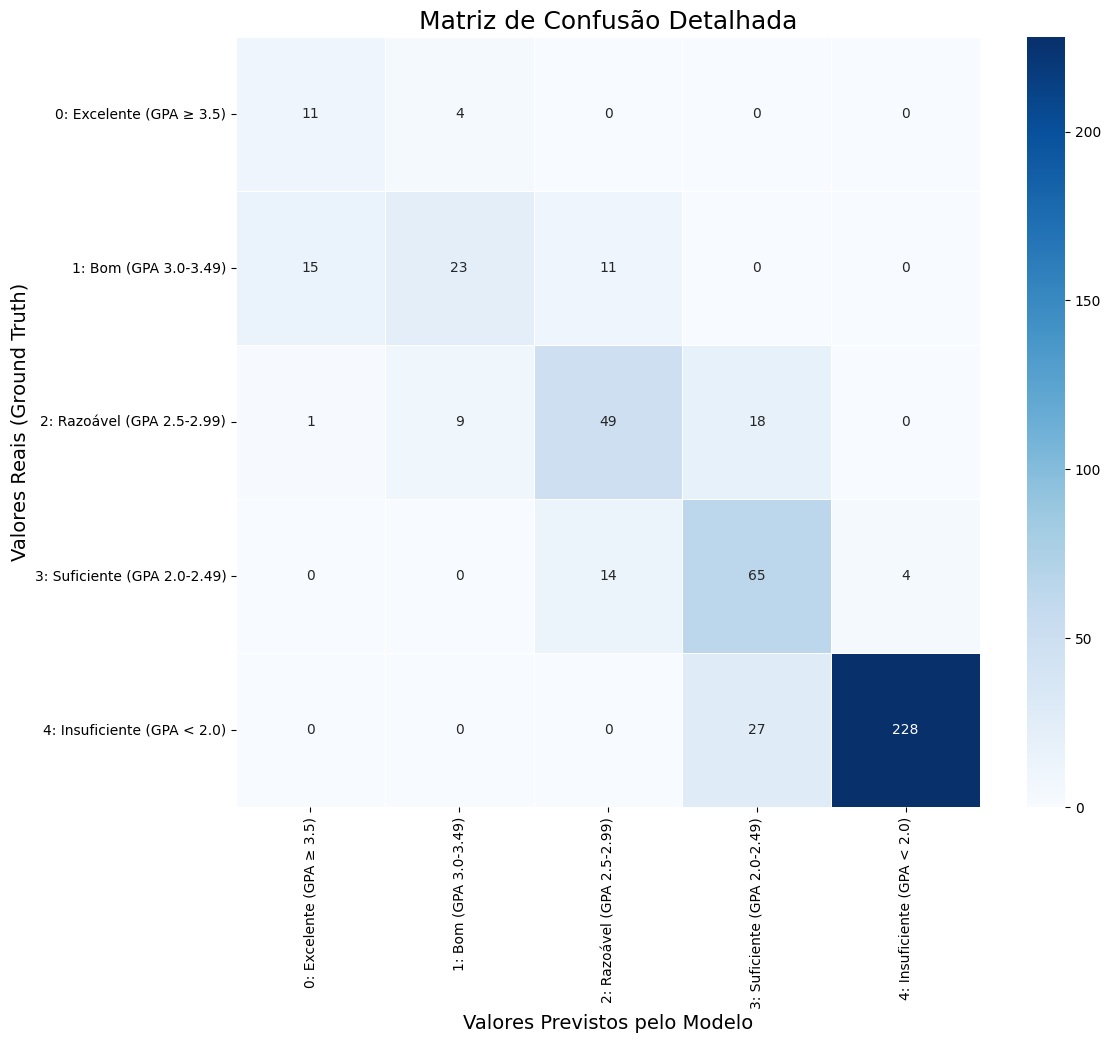

In [218]:
class_labels = [
    '0: Excelente (GPA ≥ 3.5)', 
    '1: Bom (GPA 3.0-3.49)', 
    '2: Razoável (GPA 2.5-2.99)', 
    '3: Suficiente (GPA 2.0-2.49)', 
    '4: Insuficiente (GPA < 2.0)'
]

conf_matrix_data = confusion_matrix(y_test, y_pred)

# Criando a figura do gráfico
plt.figure(figsize=(12, 10))

# Criando o heatmap com seaborn
sns.heatmap(conf_matrix_data, 
            annot=True,          # Escreve os números em cada célula
            fmt='d',             # Formata os números como inteiros
            cmap='Blues',        # Esquema de cores
            xticklabels=class_labels,
            yticklabels=class_labels,
            linewidths=.5)

# Adicionando títulos e rótulos para melhor explicação
plt.title('Matriz de Confusão Detalhada', fontsize=18)
plt.ylabel('Valores Reais (Ground Truth)', fontsize=14)
plt.xlabel('Valores Previstos pelo Modelo', fontsize=14)

# Exibindo o gráfico
plt.show()